# Problema 1 (tema 3)

Deducir la fórmula compuesta de los trapecios, así como la expresión del error. Utilizando esta fórmula, calcular una aproximación de la integral

$$
 \int_0^1 \log(1+x^2)\, dx
 $$
 
en la que podamos garantizar que el error de cuadratura es menor que $\varepsilon=0.001$. ¿En cuántos subintervalos hay que dividir el intervalo $[0,1]$?

### 1. Fórmula compuesta de los trapecios

La fórmula de los trapecios es una fórmula de cuadratura con dos puntos ($n=1$) que, en un intervalo $[\alpha,\beta]$, se escribe como

 $$
  \int_{\alpha}^{\beta} f(x)\,dx = \frac{h}{2}(f(\alpha)+f(\beta)) - \frac{h^3}{12} f''(\xi), \quad \xi\in(\alpha,\beta),
  $$
  
donde $h=\beta-\alpha$. En el caso de una fórmula **compuesta**, dividimos el intervalo $[a,b]$ en $N$ subintervalos $[\overline x_i, \overline x_{i+1}]$ y en cada uno de ellos aplicamos la f.c anterior. 

En el caso de la f.c. de los trapecios, los nodos de cuadratura, a los que denotamos $x_i$, son iguales a los extremos de los subintervalos, es decir 
$$
x_i=\overline x_i, \quad i=0,...,N.
$$

Denotando $h=x_{i+1}-x_i = (b-a)/N$, y aplicando la fórmula anterior con $[a,b]=[x_i, x_{i+1}]$, obtenemos la siguiente expresión de la fórmula compuesta de los trapecios:
$$
  \int_{a}^{b} f(x)\,dx 
  = \sum_{i=0}^{N-1}  \int_{i}^{x_{i+1}} f(x)\,dx
  = \frac{h}{2} \sum_{i=0}^{N-1} (f(x_i)+f(x_{i+1})) 
    - \frac{h^3}{12}  \sum_{i=0}^{N-1} f''(\xi_i),
  $$

donde $\xi_i\in (x_i,x_{i+1})$.

Podemos eliminar el sumatorio que aparece en el último término (término de error) en la expresión anterior. Para ello, tenemos en cuenta que
$$
  m_2 \le \frac 1 N \sum_{i=0}^{N-1} f''(\xi_i) \le M_2,
  $$
  
donde $m_2=\min_{x\in[a,b]} |f''(x)|$ y $M_2=\max_{x\in [a,b]} |f''(x)|$. Como $f''$ es continua, alcanza todos los valores entre $m_2$ y $M_2$, en particular existe $\xi\in[a,b]$ tal que
 $$
  f''(\xi) = \frac 1 N \sum_{i=0}^{N-1} f''(\xi_i).
  $$
  
Luego
 $$
  \sum_{i=0}^{N-1} f''(\xi_i) = N f''(\xi) = \frac{b-a} h f''(\xi).
  $$
  
Sustituyendo en la expresión anterior de la fórmula compuesta, tenemos la fórmula compuesta de los trapecios definitiva:
 $$
  \int_{a}^{b} f(x)\,dx 
  = \sum_{i=0}^{N-1}  \int_{i}^{x_{i+1}} f(x)\,dx
  =  \frac{h}{2} \sum_{i=0}^{N-1}(f(x_i)+f(x_{i+1})) 
    - \frac{(b-a) h^2}{12}f''(\xi),
  $$

donde $\xi\in [a,b]$.


### 2. Cálculo del número de intervalos necesarios para que el error sea menor que $\varepsilon$

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [11]:
a, b = 0., 1.
def f(x): return log(1+x**2)
epsilon = 0.001 

Para acotar el error en la fórmula de los trapecios, tendremos que tomar máximo en $f''$:


$$
  |E_N(f)| \le  \frac{(b-a) h^2}{12} \max_{x\in [a,b]} |f''(x)|.
  $$
  
Estudiaremos la expresión de $f''(x)$ para intentar hallar el máximo en $[a,b]=[0,1]$.

  * $\displaystyle f'(x)=\frac{2x}{1+x^2}$
  * $\displaystyle f''(x)=\frac{2(1+x^2) - 2x\cdot2x}{(1+x^2)^2}
      = \frac{2 - 2x^2}{(1+x^2)^2}$
      
Podemos ver gráficamente que esta función es decreciente en $[0,1]$:

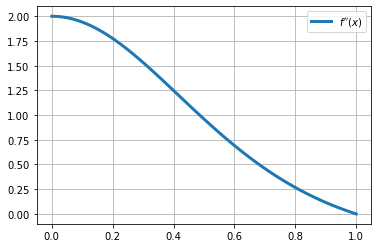

In [12]:
def D2f(x): return (2 - 2*x**2)/((1+x**2)**2)
xx = linspace(a, b, 100)
plot(xx, D2f(xx), lw=3, label="$f''(x)$")
legend()
grid()

Aceptando que $f''(x)$ es decreciente en $[0,1]$ (para confirmalo tendríamos que ver que $f'''(x)\le 0$), podemos concluir que $M_2=\max_{[0,1]}|f''(x)| = |f''(0)|$ ó $|f''(1)|$. En este caso:

In [13]:
print abs(D2f(0)), ",", abs(D2f(1))
M2 = max(D2f(0), D2f(1))
print M2

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (75101452.py, line 1)

Luego
$$
  |E_N(f)| \le  \frac{(b-a) h^2}{12} M_2 = \frac{h^2}{6}.
  $$
  

Para que el error sea manor que $\varepsilon=0.001$, basta tomar $h$ tal que:

$$
  \frac{h^2}{6} = \varepsilon,
  $$

es decir

 $$
  h = +\sqrt{6 \varepsilon} = +\sqrt{0.006}
  $$



In [14]:
h = sqrt(0.006)
h

0.07745966692414834

Como el número de subintervalos es $N=(b-a)/h$,  se debe verificar que $N$ sea superior a

In [15]:
(b-a)/h

12.909944487358056

El mínimo número de intervalos necesarios es $N=13$. Seguidamente, implementaremos en el ordenador la fórmula de los trapecios:

$$
  \sum_{i=0}^{N-1}\frac{h}{2}(f(x_i)+f(x_{i+1})) 
= h(f(x_0)/2 + \sum_{i=1}^{N-1} f(x_i) + f(x_N)/2)
  $$

In [17]:
N = 13
h = float(b-a)/N

# Definimos $N+1$ nodos equidistribuidos en [a,b]
x = linspace(a, b, N+1)
x_interior = array( [x[i] for i in range(1, N)] )  # x1, x2, ..., x_{N-1}

quad_f = h*( f(a)/2 + sum(f(x_interior)) + f(b)/2 )
print("Cuadratura:", quad_f)

# Comparamos con la función predefinida en Python
from scipy.integrate import quad
quad_python = quad(f, a, b)
print("Cuadratura de python:", quad_python)

print("Diferencia:", quad_f - quad_python[0])

Cuadratura: 0.2644366525894482
Cuadratura de python: (0.26394350735484196, 2.930361590656649e-15)
Diferencia: 0.0004931452346062515
